In [1]:
import pandas as pd

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Department": ["HR", "IT", "IT", "HR", "Finance"],
    "Salary": [45000, 80000, 75000, 52000, 61000],
    "Experience": [2, 5, 4, 3, 6]
})

In [2]:
df.head()

,Name,Department,Salary,Experience
0,Alice,HR,45000,2
1,Bob,IT,80000,5
2,Charlie,IT,75000,4
3,David,HR,52000,3
4,Eva,Finance,61000,6


In [5]:
df_filtered = df[(df["Department"] == "IT") & (df["Salary"] > 75000)] #always use () bracket to each conditon
df_filtered.head()

,Name,Department,Salary,Experience
1,Bob,IT,80000,5


In [ ]:
#Transforming Data with map(), apply(), and lambda

#map() is Series-specific; apply() works on Series and DataFrames, often with more flexibility

In [7]:
df["Bonus"] = df["Salary"].apply(lambda x : x*0.10)
df.head()

,Name,Department,Salary,Experience,Bonus
0,Alice,HR,45000,2,4500.0
1,Bob,IT,80000,5,8000.0
2,Charlie,IT,75000,4,7500.0
3,David,HR,52000,3,5200.0
4,Eva,Finance,61000,6,6100.0


In [10]:
df.apply(sum) #tries to apply in columns level by default
df.apply(sum,axis=1) #tries to apply row leve


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [11]:
df["Experience Level"] = df["Experience"].map(lambda x: "Senior" if x >= 5 else "Junior")
df

,Name,Department,Salary,Experience,Bonus,Experience Level
0,Alice,HR,45000,2,4500.0,Junior
1,Bob,IT,80000,5,8000.0,Senior
2,Charlie,IT,75000,4,7500.0,Junior
3,David,HR,52000,3,5200.0,Junior
4,Eva,Finance,61000,6,6100.0,Senior


GroupBy and Aggregation

In [14]:
avg_salary = df.groupby("Department")
print(avg_salary)

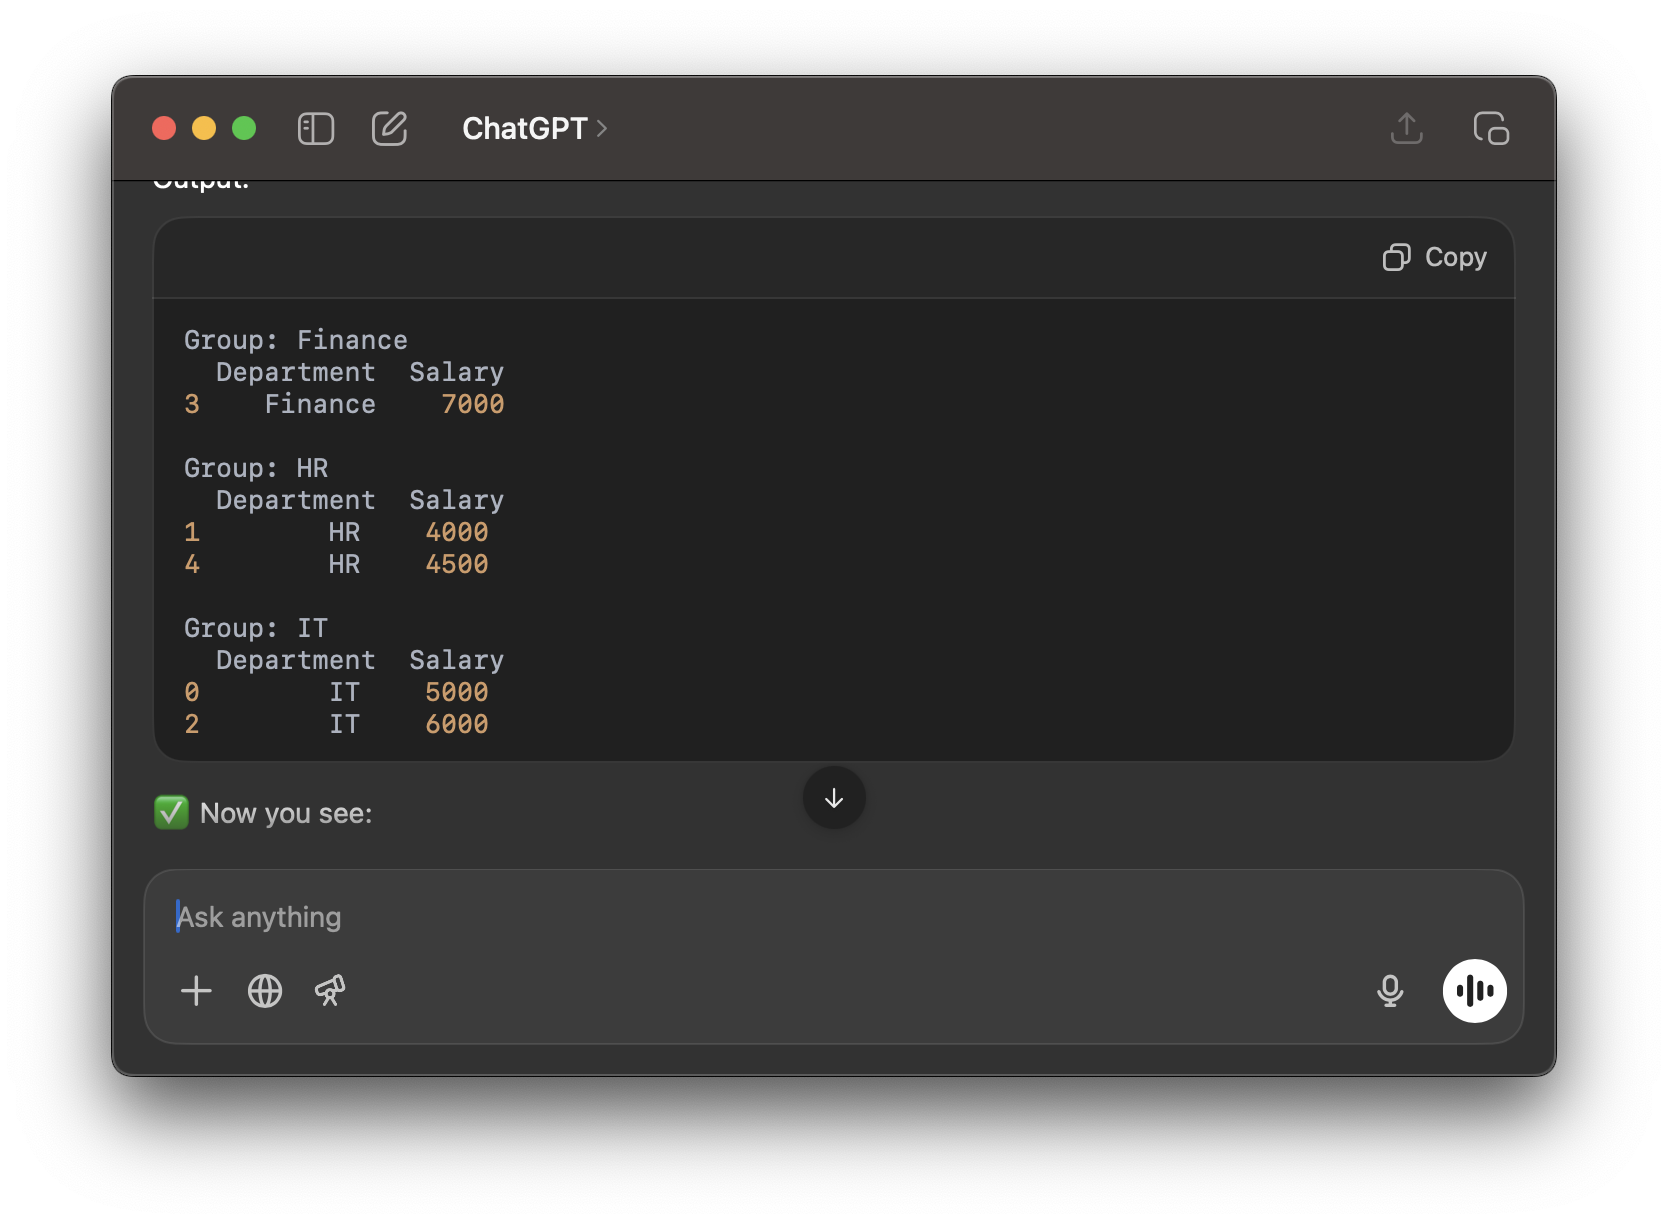

In [16]:
avg_salary = df.groupby("Department")["Salary"].sum()
avg_salary

,Salary
Department,
Finance,61000
HR,97000
IT,155000


In [18]:
groupd = df.groupby("Department").agg({"Salary":"sum", "Bonus": "mean"})
groupd

,Salary,Bonus
Department,,
Finance,61000,6100.0
HR,97000,4850.0
IT,155000,7750.0


In [21]:
df_bonus = pd.DataFrame({
    "Name": ["Alice", "Bob", "Eva"],
    "Bonus_Extra": [1500, 3000, 2500]
})

print(df_bonus)

# Merge based on Name --- same as join in spark
merged_df = pd.merge(df, df_bonus, on="Name", how="left")
print("Merged DataFrame:")
print(merged_df)

# Concatenate two copies of the DataFrame
concatenated = pd.concat([df, df], ignore_index=True)
print("\nConcatenated DataFrame (double rows):")
print(concatenated.head())

    Name  Bonus_Extra
0  Alice         1500
1    Bob         3000
2    Eva         2500
Merged DataFrame:
      Name Department  Salary  Experience   Bonus Experience Level  \
0    Alice         HR   45000           2  4500.0           Junior   
1      Bob         IT   80000           5  8000.0           Senior   
2  Charlie         IT   75000           4  7500.0           Junior   
3    David         HR   52000           3  5200.0           Junior   
4      Eva    Finance   61000           6  6100.0           Senior   

   Bonus_Extra  
0       1500.0  
1       3000.0  
2          NaN  
3          NaN  
4       2500.0  

Concatenated DataFrame (double rows):
      Name Department  Salary  Experience   Bonus Experience Level
0    Alice         HR   45000           2  4500.0           Junior
1      Bob         IT   80000           5  8000.0           Senior
2  Charlie         IT   75000           4  7500.0           Junior
3    David         HR   52000           3  5200.0           Juni

🔹 pd.concat()
	•	Used to stack DataFrames together (like “gluing” them).
	•	Works along rows (axis=0) or columns (axis=1).
	•	Think: append tables one after another.

👉 Example 1: Row-wise concat (default axis=0)

🔹 pd.merge()
	•	Used to combine DataFrames based on matching values (like SQL joins).
	•	Requires at least one common column (or you specify with on=...).
	•	Think: lookup / join on keys.

📊 5. Pivot Tables and Crosstabs

In [23]:

# Pivot table: average salary by department and experience level
pivot = pd.pivot_table(df, index="Department", values="Salary", columns="Experience Level", aggfunc="mean")
print(pivot)

# Crosstab: frequency count
cross = pd.crosstab(df["Department"], df["Experience Level"])
print("\nCrosstab:")
print(cross)

Experience Level   Junior   Senior
Department                        
Finance               NaN  61000.0
HR                48500.0      NaN
IT                75000.0  80000.0

Crosstab:
Experience Level  Junior  Senior
Department                      
Finance                0       1
HR                     2       0
IT                     1       1


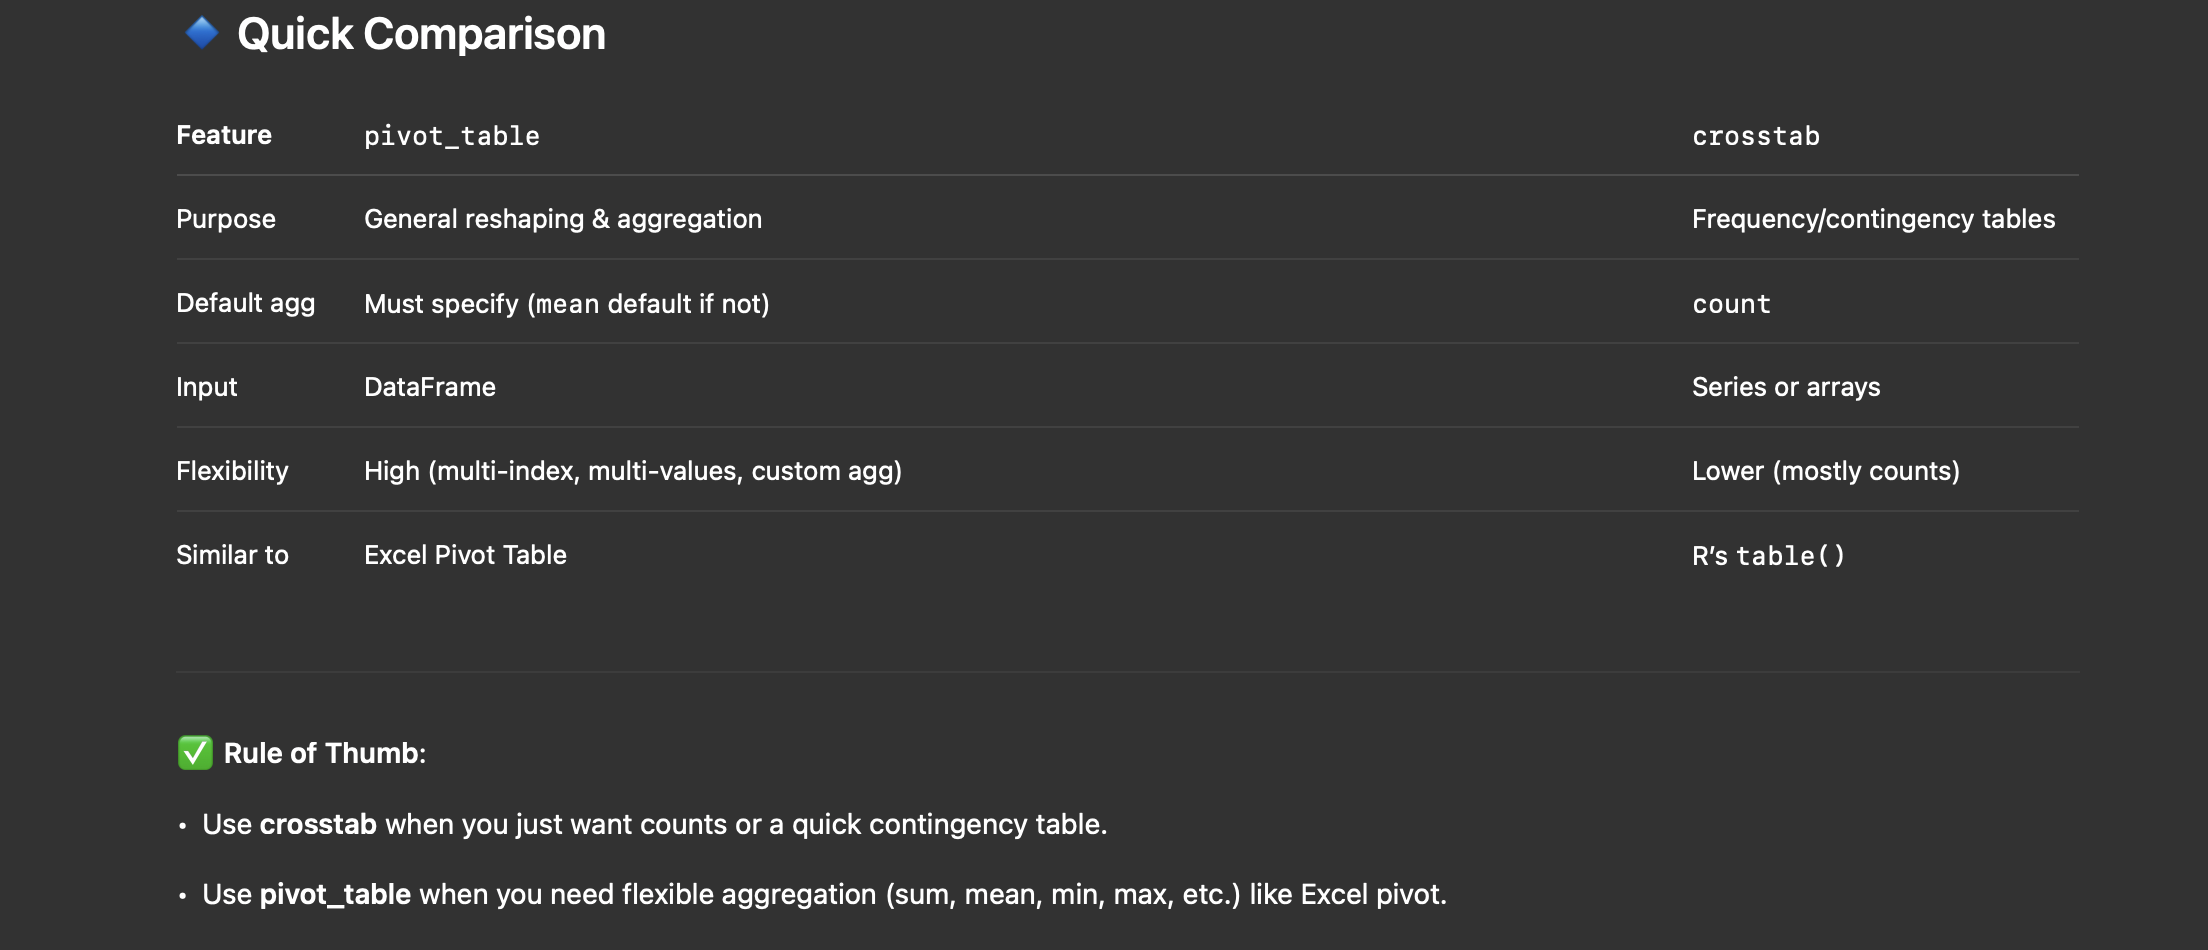